## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [3]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 20% of the data in the test set
4. Normalize the data with QuantileTransformer. Many of the features are highly skewed.

In [4]:
# answer below:

reviews2 = reviews.drop(columns=['App', 'Category', 'Size', 'Installs', 
                                 'Genres', 'Last Updated', 'Current Ver',  'Android Ver' ])
reviews2.head()

,Rating,Reviews,Type,Price,Content Rating
0,4.1,159,Free,0,Everyone
1,3.9,967,Free,0,Everyone
2,4.7,87510,Free,0,Everyone
3,4.5,215644,Free,0,Teen
4,4.3,967,Free,0,Everyone


In [5]:
reviews2.dropna(inplace=True)

reviews3 = reviews2.iloc[np.where(~reviews2['Content Rating'].isin(['Unrated','Adults only 18+']))]

reviews3.isnull().sum()/reviews3.isnull().count()

Rating            0.0
Reviews           0.0
Type              0.0
Price             0.0
Content Rating    0.0
dtype: float64

In [6]:
reviews4 = pd.get_dummies(reviews3, columns=['Type', 'Content Rating'], drop_first=True)
reviews4['Reviews'] = pd.to_numeric(reviews4['Reviews'])
reviews4['Price'] = pd.to_numeric(reviews4['Price'].str.strip('$'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

y = y = reviews4['Rating']
X = reviews4.drop('Rating', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

Create a linear regression model using statsmodels. Look at the coefficient values and their associated p values. Additionally, check model assumptions of homoscedacity, normality of errors, and multicollinearity.

In [7]:
#answer below:

import statsmodels.api as sm

X_train_scaled_constant = sm.add_constant(X_train_scaled)




In [8]:
results = sm.OLS(y_train, X_train_scaled_constant).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     70.43
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.10e-85
Time:                        17:12:57   Log-Likelihood:                -5425.8
No. Observations:                7489   AIC:                         1.087e+04
Df Residuals:                    7482   BIC:                         1.091e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9834      0.012    327.208      0.000       3.960       4.007
x1             0.4069      0.021     19.588      0.000       0.366       0.448
x2            -1.8013      1.066     -1.689      0.091      -3.892       0.289
x3             1.9087      1.029      1.855      0.064      -0.108       3.926
x4            -0.0264      0.029     -0.919      0.358      -0.083       0.030
x5            -0.1107      0.027     -4.085      0.000      -0.164      -0.058
x6            -0.0025      0.018     -0.140      0.889      -0.038       0.033
==============================================================================
Omnibus:                     2255.277   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10079.993
Skew:                          -1.405   Prob(JB):                         0.00
Kurtosis:                       7.940   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

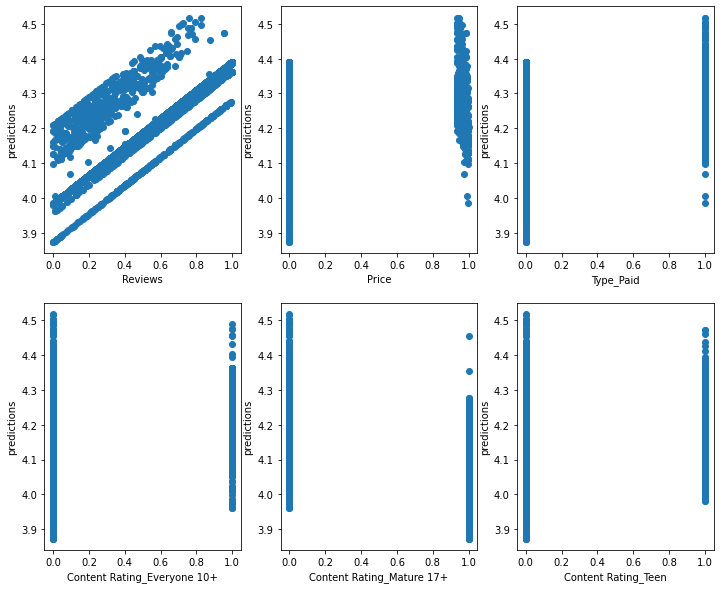

In [9]:
X_train_pred = results.predict(X_train_scaled_constant)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
plot_number = 1
plt.figure(figsize=[12, 10])
for col in X_train_scaled_df.columns:
    plt.subplot(2, 3, plot_number)
    plot_number += 1
    plt.scatter(X_train_scaled_df[col], X_train_pred)
    plt.xlabel(col)
    plt.ylabel("predictions")

In [10]:
residual = y_train - X_train_pred
np.mean(residual)

1.3379721804899096e-14

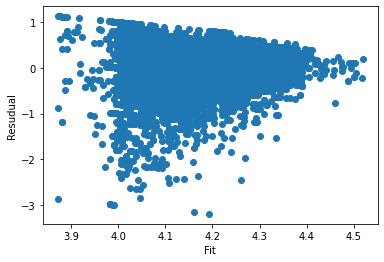

In [11]:
plt.scatter(X_train_pred, residual)
plt.xlabel('Fit')
plt.ylabel('Resudual')
plt.show()

In [12]:
pd.DataFrame(X_train_scaled, columns=X_train.columns).corr()

,Reviews,Price,Type_Paid,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
Reviews,1.000000,-0.193647,-0.193992,0.117540,0.030049,0.140800
Price,-0.193647,1.000000,0.999761,0.007231,-0.023275,-0.049268
Type_Paid,-0.193992,0.999761,1.000000,0.007431,-0.023546,-0.049524
Content Rating_Everyone 10+,0.117540,0.007231,0.007431,1.000000,-0.048003,-0.077871
Content Rating_Mature 17+,0.030049,-0.023275,-0.023546,-0.048003,1.000000,-0.082397
Content Rating_Teen,0.140800,-0.049268,-0.049524,-0.077871,-0.082397,1.000000


/Users/abilenky/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


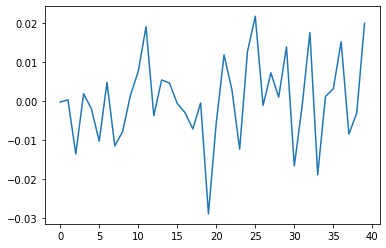

In [13]:
from statsmodels.tsa.stattools import acf

acf_data = acf(residual)

plt.plot(acf_data[1:])
plt.show()

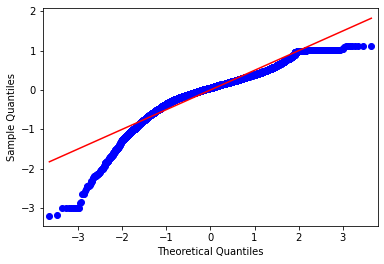

(array([  13.,   12.,   37.,   71.,  150.,  415., 1269., 3582., 1557.,
         383.]),
 array([-3.19358036, -2.76149731, -2.32941427, -1.89733122, -1.46524817,
        -1.03316512, -0.60108208, -0.16899903,  0.26308402,  0.69516707,
         1.12725011]),
 <BarContainer object of 10 artists>)

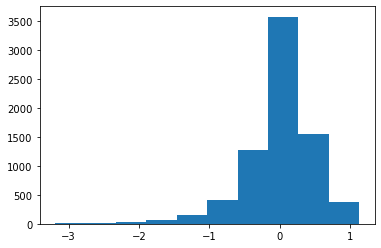

In [14]:
sm.qqplot(residual, line="s")
plt.show()
plt.hist(residual)

Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

In [15]:
#answer below:
y = y = reviews4['Rating']
X = reviews4[['Reviews','Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

X_train_scaled_constant = sm.add_constant(X_train_scaled)

results = sm.OLS(y_train, X_train_scaled_constant).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     210.4
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.20e-89
Time:                        17:12:59   Log-Likelihood:                -5465.8
No. Observations:                7489   AIC:                         1.094e+04
Df Residuals:                    7486   BIC:                         1.096e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9705      0.012    327.184      0.000       3.947       3.994
x1             0.4152      0.020     20.291      0.000       0.375       0.455
x2             0.1635      0.024      6.817      0.000       0.116       0.210
==============================================================================
Omnibus:                     2345.094   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10925.444
Skew:                          -1.452   Prob(JB):                         0.00
Kurtosis:                       8.156   Cond. No.                         5.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot the scatterplots between the independent variables you select and ratings. Do you think given these graphs, these variables have good predictive power? 

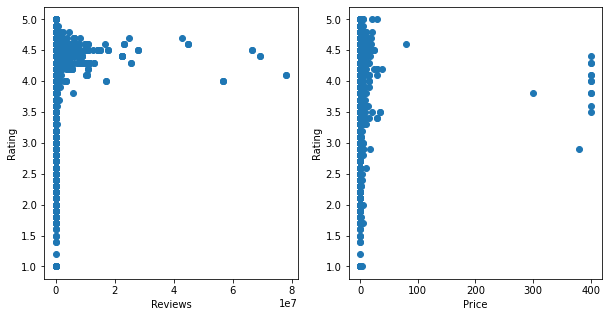

In [16]:
# answer below:
plot_number = 1
plt.figure(figsize=[10, 5])
for col in X_train.columns:
    plt.subplot(1, 2, plot_number)
    plot_number += 1
    plt.scatter(X_train[col], y_train)
    plt.xlabel(col)
    plt.ylabel("Rating")




What data processing could you do to improve this model? Experiment.

In [17]:
reviews5 = reviews4.iloc[np.where(reviews4['Reviews'] > 30)]

y = reviews5['Rating']
X = reviews5[['Reviews','Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

X_train_scaled_constant = sm.add_constant(X_train_scaled)

results = sm.OLS(y_train, X_train_scaled_constant).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     411.8
Date:                Tue, 20 Oct 2020   Prob (F-statistic):          3.95e-169
Time:                        17:13:00   Log-Likelihood:                -3659.0
No. Observations:                6524   AIC:                             7324.
Df Residuals:                    6521   BIC:                             7344.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9226      0.011    358.763      0.000       3.901       3.944
x1             0.5215      0.019     28.174      0.000       0.485       0.558
x2             0.2490      0.023     10.599      0.000       0.203       0.295
==============================================================================
Omnibus:                     1854.678   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7149.103
Skew:                          -1.371   Prob(JB):                         0.00
Kurtosis:                       7.334   Cond. No.                         5.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

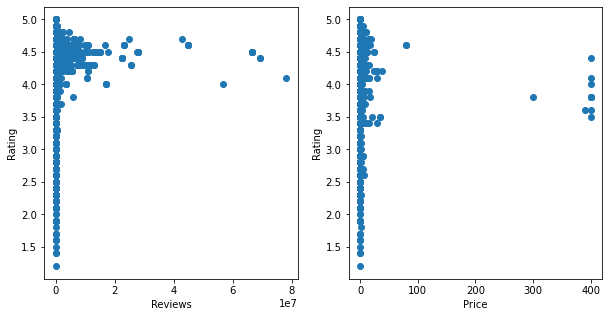

In [18]:
plot_number = 1
plt.figure(figsize=[10, 5])
for col in X_train.columns:
    plt.subplot(1, 2, plot_number)
    plot_number += 1
    plt.scatter(X_train[col], y_train)
    plt.xlabel(col)
    plt.ylabel("Rating")